# 파이썬과 함수 최적화만 사용하여 로지스틱 만들기



### 모듈 임포트

- 파이썬 문법 시간에 배운대로 파이썬을 제대로 활용할려면 최소한의 외부 라이브러리가 필요합니다.

- 여기서는 그림을 그리기 위해 `matplotlib`와 함수를 최소화하기 위한 `minimize`함수를 임포트 하겠습니다.

In [1]:
import matplotlib.pyplot as plt

# minimize 임포트
from scipy.optimize import minimize

-  `minimize`함수를 사용하는 방법을 간단히 데모하겠습니다.
```python
minimize(function, ininial_value)
```

- `minimize`함수는 첫번째로 최소화 시킬 함수를 전달받고, 두번째로 함수를 최소화 시킬 시작점인 초기값을 전달 받습니다.

- 간단하게 정의할 수 있는 2차 함수를 가지고 `minimize`함수를 사용해보겠습니다.

In [2]:
# 입력 x를 받는 테스트 함수를 정의 합니다.
def f(x):
    return x**2 + 2*x + 3  # (x+1)**2 + 2

- 정의된 $x^2 + 2x + 3$은 간단한 계산으로 쉽게 최소값을 주는 $x$를 구할 수 있지만 `minimize`를 사용하는 방법을 익히기 위한 것이므로 여기서는 최소값을 모른다고 가정합니다.

- 이제 `minimize`함수에 앞서 정의한 `f`를 주고 `0.2`부터 시작해서 최소값을 찾기로 해보겠습니다.

In [3]:
result = minimize(f, 0.2)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0
        x: [-1.000e+00]
      nit: 2
      jac: [ 2.980e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

- 결과를 보면 두번만에 최적해애 도달했음을 알 수 있습니다. (`nit:2`로 부터 반복번수가 두 번임을 알 수 있습니다.)

- 찾고자 하는 `x`의 값은 -1입니다.

- 실제로 2차 함수의 포물선 그래프를 그려서 결과를 도식적으로 확인해보도록 하겠습니다.

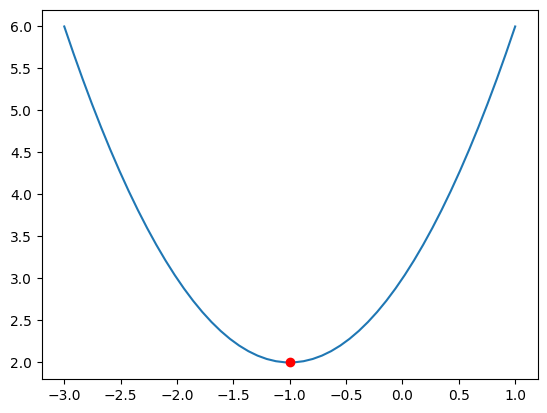

In [4]:
import numpy as np

x = np.linspace(-3, 1, 50)

def y(x):
    return x**2 + 2*x + 3

plt.plot(x, y(x))

# 최적점 표시
plt.plot(result.x[0], y(result.x[0]), 'ro')

plt.show()

- `x=-1.0`일 때 포물선의 가장 아래로 볼록한 위치가 확인됩니다.

### 목적함수 정의

- 함수를 정의하고 그 함수를 `minimize`에 넘기면 함수를 최소화 시키는 `x`를 구해준다는 것을 알았습니다.

- 이제 이 실습에서 해결해야하는 과제는 주어진 점과 회귀선의 에러 총합을 함수로 정의하고 그 함수를 `minimize`함수에 넘기는 것입니다.

- 먼저 임의의 데이터를 정의하겠습니다. 이 데이터를 공부시간에 따른 합격과 불합격이라고 생각해보겠습니다.

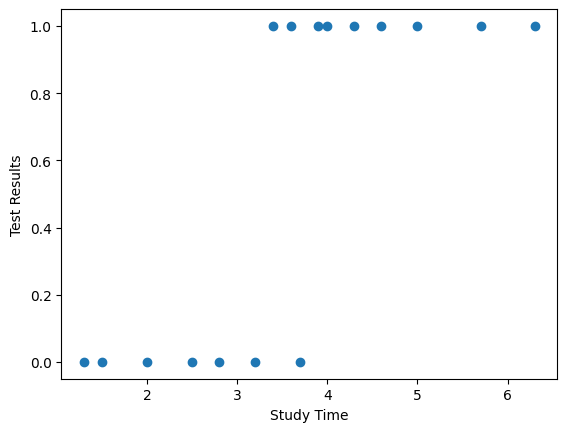

In [5]:
X = [1.3, 1.5, 2.0, 2.5, 2.8, 3.2, 3.4, 3.6, 3.7, 3.9, 4.0, 4.3, 4.6, 5.0, 5.7, 6.3]
y = [0  , 0  , 0,   0,   0,   0,   1,   1,   0,   1,   1,   1,   1,   1,   1,   1 ]

plt.plot(X, y, 'o')
plt.xlabel('Study Time')
plt.ylabel('Test Results')
plt.show()

D = {'data':X, 'target':y}

- 위와 같은 데이터에 선형회귀 코드를 그대로 적용해봅시다.

- 결과를 확인한 후 결과를 개선하기 위해 모델의 예측

$$
\hat{y}_i = w_1 x + w_0
$$

에 다음처럼 적절한 변환을 수행해봅시다.

$$
\sigma(\hat{y}_i) = \frac{1}{1+ \exp(-\hat{y}_i)}
$$

- 모델의 최종 출력을 다음처럼 변환하고 다시 코드를 실행하여 결과를 확인합시다.

- 단 마지막 그림 그리는 코드도 $\sigma(\hat{y}_i)$으로 그려야 함

In [6]:
e = 2.718

class Loss:
    def __init__(self, D):
        # D로 부터 내부 변수로 X, y, N을 초기화
        self.X = D['data']
        self.y = D['target']
        self.N = len(self.X)

    def __call__(self, w):
        """
        w: 매개변수 w0, w1가 포함된 리스트
        """
        loss = self.forward(w)
        return loss

    def forward(self, w):
        # 모든 점에서 발생하는 에러를 저장할 리스트를 만듭니다.
        errors = []

        # 모든 점을 순회하면서
        for x, y in zip(self.X, self.y):
            # 모델로 예측값을 구합니다.
            y_hat = w[1]*x + w[0]
            # 예측과 정답의 차이를 제곱해서 errors 리스트에 추가합니다.
            errors.append( (y_hat - y)**2 )

        # for 문을 마치고 나면 errors에 모든 에러값이 들어 있으므로
        # 이를 모두 더하고 2N로 나눕니다.
        return sum(errors) / (2*self.N)
        ####################################################



In [7]:
# 손실 함수 객체를 만들고
loss = Loss(D)

- `loss`객체에서 적당한 값을 대입하고 함수값이 잘 구해지는지 테스트해보겠습니다.

In [8]:
loss([3, 2])

49.48375

### 최적화

- 이제 적당히 초기 `w`값을 잡고 `minimize`함수를 실행하면 됩니다.

In [9]:
# 초기 값은 그냥 0, 0으로 잡습니다.
# 아래 numpy 버전에서 알아보겠지만 아무런 초기값을 잡아도 상관없습니다.
w = [0, 0]

# 최적화를 수행합니다.
ret = minimize(loss, w)

ret

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.05082232691175417
        x: [-4.449e-01  2.789e-01]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 8.026e+00 -1.945e+00]
            [-1.945e+00  5.384e-01]]
     nfev: 21
     njev: 7

- 알아낸 파라메터로 그림을 그려보면 최적의 직선이 구해졌음을 알 수 있습니다.

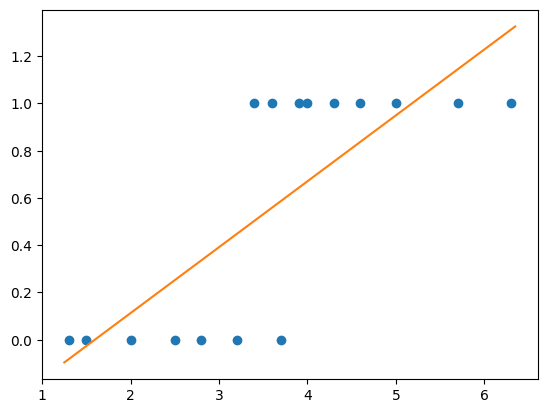

In [10]:
x = np.linspace(1.25, 6.35, 50)

w0 = ret.x[0]
w1 = ret.x[1]

y_hat = w1*x + w0

plt.plot(X, y, 'o')
plt.plot(x, y_hat)
plt.show()